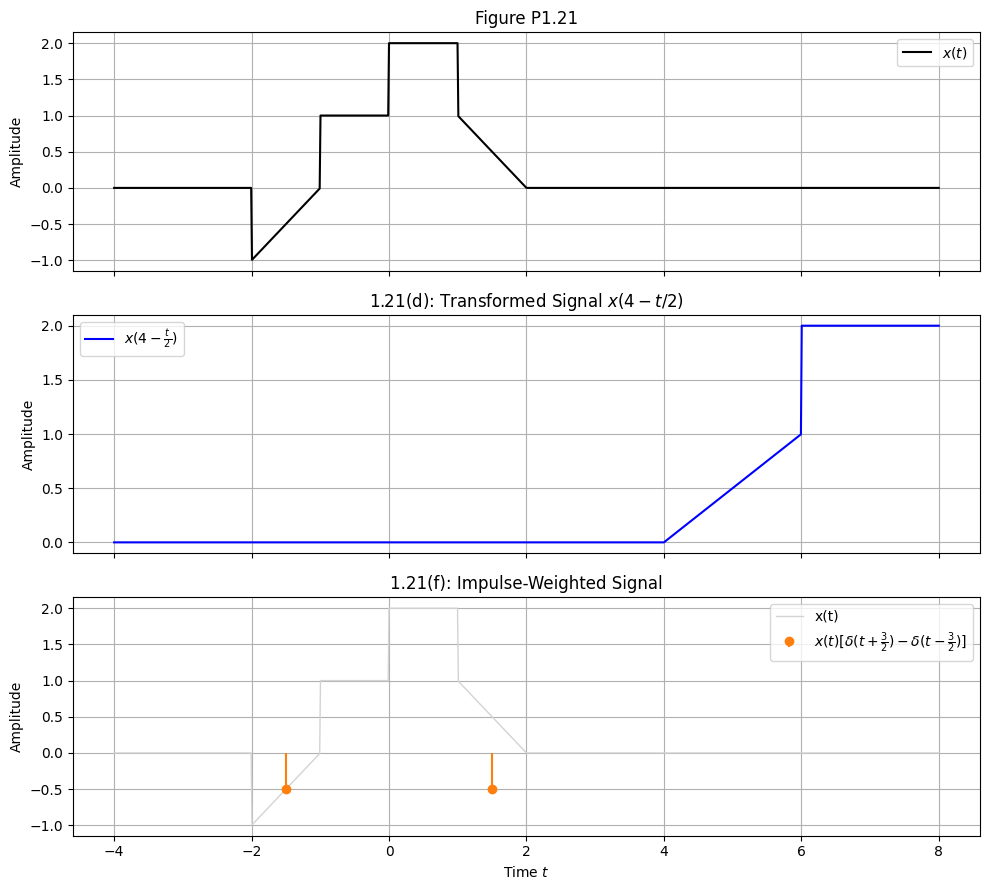

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Corrected original signal x(t)
def x_original(t):
    y = np.zeros_like(t)

    # From -2 to -1: linearly increases from -1 to 0
    mask1 = (t >= -2) & (t < -1)
    y[mask1] = t[mask1] + 1

    # From -1 to 0: constant at 1
    mask2 = (t >= -1) & (t < 0)
    y[mask2] = 1

    # From 0 to 1: constant at 2
    mask3 = (t >= 0) & (t < 1)
    y[mask3] = 2

    # From 1 to 2: linear decrease from 1 to 0
    mask4 = (t >= 1) & (t <= 2)
    y[mask4] = -t[mask4] + 2

    return y

# Time axis
t = np.linspace(-4, 8, 1000)

# 1.21(d): x(4 - t/2)
x_transformed = x_original(4 - t / 2)

# 1.21(f): Impulse-weighted x(t)
delta_locs = np.array([-1.5, 1.5])
delta_vals = np.array([x_original(np.array([-1.5])), -x_original(np.array([1.5]))])

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

# Original x(t)
axs[0].plot(t, x_original(t), label=r'$x(t)$', color='black')
axs[0].set_title('Figure P1.21')
axs[0].grid(True)
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# 1.21(d)
axs[1].plot(t, x_transformed, label=r'$x(4 - \frac{t}{2})$', color='blue')
axs[1].set_title('1.21(d): Transformed Signal $x(4 - t/2)$')
axs[1].grid(True)
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# 1.21(f)
axs[2].plot(t, x_original(t), color='lightgray', linewidth=1, label='x(t)')
axs[2].stem(delta_locs, delta_vals, basefmt=" ", linefmt='C1-', markerfmt='C1o',
            label=r'$x(t)[\delta(t+\frac{3}{2}) - \delta(t - \frac{3}{2})]$')
axs[2].set_title('1.21(f): Impulse-Weighted Signal')
axs[2].grid(True)
axs[2].set_xlabel('Time $t$')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

plt.tight_layout()
plt.show()

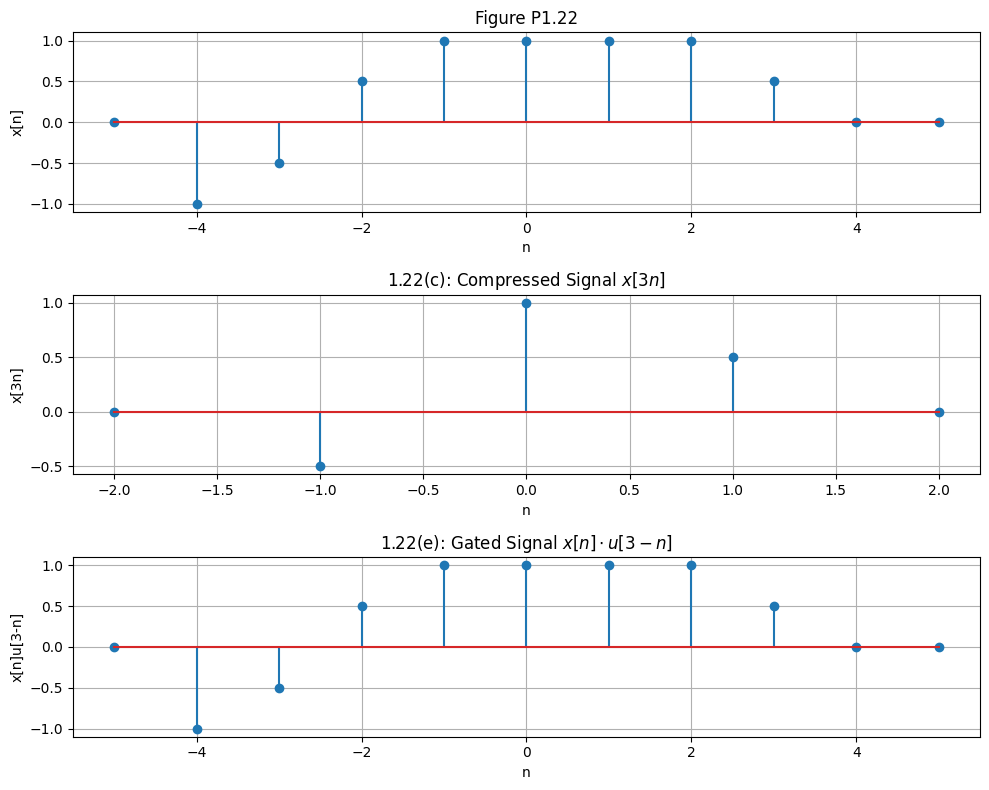

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define original discrete-time signal x[n]
x_vals = {
    -4: -1,
    -3: -0.5,
    -2: 0.5,
    -1: 1,
     0: 1,
     1: 1,
     2: 1,
     3: 0.5,
}

# Build x[n] over a range
n = np.arange(-5, 6)
x = np.array([x_vals.get(i, 0) for i in n])

# 1.22(c): x[3n]
n_3n = np.arange(-2, 3)  # Only values where 3n falls in original support
x_3n = np.array([x_vals.get(3 * i, 0) for i in n_3n])

# 1.22(e): x[n] * u[3 - n]
x_masked = np.array([x_vals.get(i, 0) if i <= 3 else 0 for i in n])

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=False)

# Original signal
axs[0].stem(n, x)
axs[0].set_title('Figure P1.22')
axs[0].set_xlabel('n')
axs[0].set_ylabel('x[n]')
axs[0].grid(True)

# 1.22(c): Compressed signal
axs[1].stem(n_3n, x_3n)
axs[1].set_title('1.22(c): Compressed Signal $x[3n]$')
axs[1].set_xlabel('n')
axs[1].set_ylabel('x[3n]')
axs[1].grid(True)

# 1.22(e): Masked signal
axs[2].stem(n, x_masked)
axs[2].set_title('1.22(e): Gated Signal $x[n] \cdot u[3 - n]$')
axs[2].set_xlabel('n')
axs[2].set_ylabel('x[n]u[3-n]')
axs[2].grid(True)

plt.tight_layout()
plt.show()

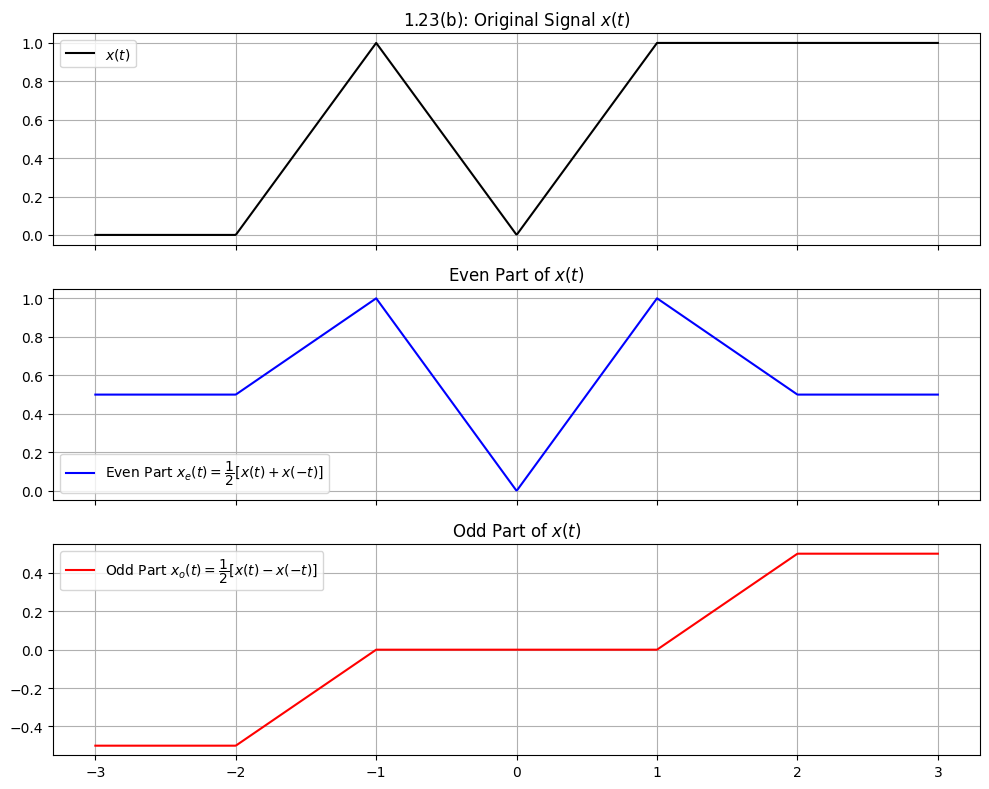

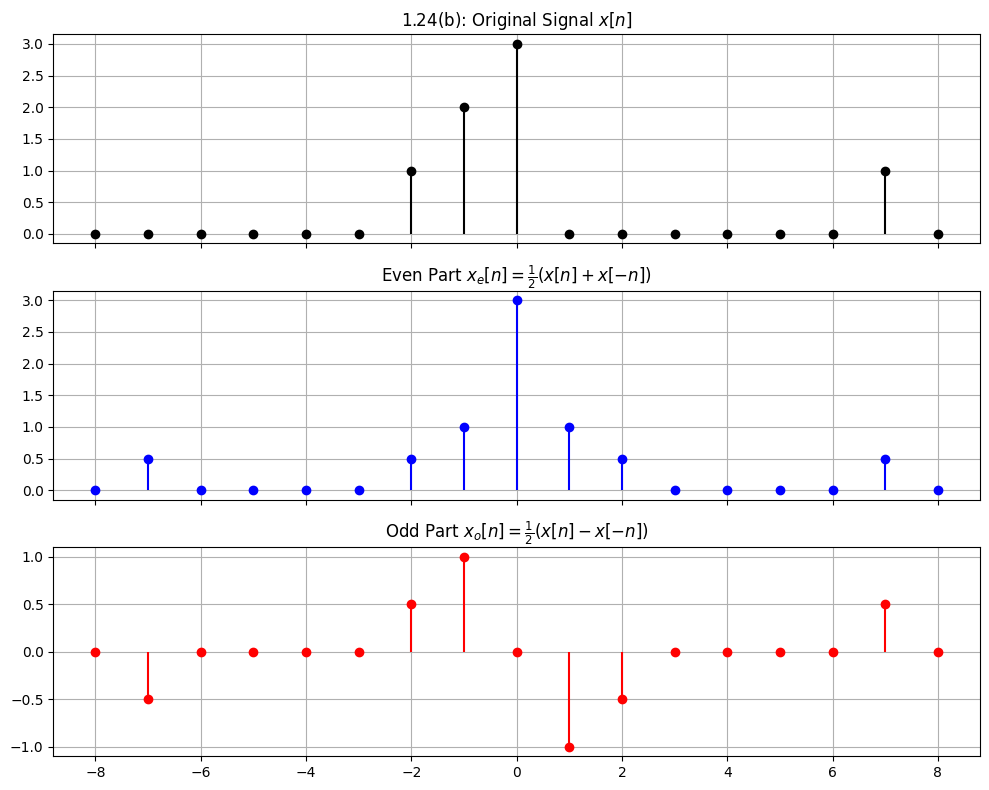

In [9]:
import numpy as np
import matplotlib.pyplot as plt

### ---- 1.23(b): Continuous-Time Signal ---- ###

# Define the original continuous signal x(t)
def x_ct(t):
    y = np.zeros_like(t)
    y[(t >= -2) & (t < -1)] = t[(t >= -2) & (t < -1)] + 2  # 0 to 1
    y[(t >= -1) & (t < 0)] = -t[(t >= -1) & (t < 0)]        # 1 to 0
    y[(t >= 0) & (t < 1)] = t[(t >= 0) & (t < 1)]            # 0 to 1
    y[t >= 1] = 1                                            # flat at 1
    return y

t = np.linspace(-3, 3, 1000)
x_t = x_ct(t)
x_neg_t = x_ct(-t)
x_even = 0.5 * (x_t + x_neg_t)
x_odd = 0.5 * (x_t - x_neg_t)

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
axs[0].plot(t, x_t, label=r'$x(t)$', color='black')
axs[0].set_title('1.23(b): Original Signal $x(t)$')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(t, x_even, label=r'Even Part $x_e(t) = \dfrac{1}{2}[x(t) + x(-t)]$', color='blue')
axs[1].set_title('Even Part of $x(t)$')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(t, x_odd, label=r'Odd Part $x_o(t) = \dfrac{1}{2}[x(t) - x(-t)]$', color='red')
axs[2].set_title('Odd Part of $x(t)$')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

### ---- 1.24(b): Discrete-Time Signal ---- ###

# Given x[n] values
x_vals = {
    -2: 1,
    -1: 2,
     0: 3,
     7: 1
}

n = np.arange(-8, 9)
x = np.array([x_vals.get(i, 0) for i in n])
x_neg = np.array([x_vals.get(-i, 0) for i in n])
x_even = 0.5 * (x + x_neg)
x_odd = 0.5 * (x - x_neg)

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
axs[0].stem(n, x, linefmt='k-', markerfmt='ko', basefmt=' ')
axs[0].set_title('1.24(b): Original Signal $x[n]$')
axs[0].grid(True)

axs[1].stem(n, x_even, linefmt='b-', markerfmt='bo', basefmt=' ')
axs[1].set_title('Even Part $x_e[n] = \\frac{1}{2}(x[n] + x[-n])$')
axs[1].grid(True)

axs[2].stem(n, x_odd, linefmt='r-', markerfmt='ro', basefmt=' ')
axs[2].set_title('Odd Part $x_o[n] = \\frac{1}{2}(x[n] - x[-n])$')
axs[2].grid(True)

plt.tight_layout()
plt.show()